# The battle of Neighborhoods

### Applied Data Science Capstone by IBM-Coursera

INDEX

#### - Business Understanding
#### - Data 
#### - Methodology 
#### - Results and Discussions
#### - Conclusion

#### 1.	Introduction:
  How safe is Boston and which is the most liveable neighborhood?
First let's start with some considerations.
  From the polls, the 27% of surveyed as of end of 2018 said they considered Boston to fairly or very unsafe. According to recent surveys the city’s low murder rate per capita (9 per 100.000) could likely be a contributing factor to this perception. The city also has the second-lowest incidence of vehicle theft at a rate of 258 per 100.000 and fares well on the other crimes rates.
  Is it true to say that Boston was more violent than New York and Seattle, but less violent than Chicago and Las Vegas, according to numbers from the FBI, based on crimes committed back in 2015.  In 12/21/18 nationally, Boston ranked 14 out of 50 according to US News. After digging up and analysing the data what we found out that in recent numbers from the Boston Police Department, or BPD, show that violent crime, as well as property crime, has continued to drop, and has been steadily dropping for past years.


#### 1.1	Business Understanding:
  Public safety is vital to public health and happiness and the safety of a state can be a crucial factor in deciding where to move with the family, or more simply for those who need to move to another city for study purposes or work, but more generally it can also be useful for a tourist to know which is the safest neighborhood where to stay. In fact, going around the various forums, it can easily be seen that the questions are often addressed to the safety of the neighborhood as well as which interesting places to visit. So the project aims to find the safest and most comfortable neighborhoods in Boston, both through the analysis of the crime rate in the various neighborhoods and through the evaluation of the best served areas for traveling, for example, or for buying food, college presence etc. .

  Therefore we will select the safest district of Boston based on the total of crimes, we will explore the various neighborhoods to find the 10 most common venues in each neighborhood and finally we will group the neighborhoods using k-mean clustering, identifying the most suitable neighborhood for the needs of the individual.

 Crime statistics will provide an overview of this problem.

 Having outlined our problem, the factors, therefore, that will influence our decision are:
1. The total number of crimes committed in each district in a year (2017)
2.The most common venues in each selected safest neighborhood.

  To extract / generate the requested information the following data sources will be required:

- Preprocessing of a Boston Police Department (BPD) dataset showing Boston crimes from 2016 to 2018.
- Conversion of District Codes into the names of their neighborhoods, with web scraping (Beatiful Soup Libraries)
- Distinction between crimes and accidents, and consequent filtering of the types of crimes
- Creation of a new dataset of Boston's safest neighborhoods and generation of their coordinates: the neighborhood coordinates will be developed using the geocoding of the Google Maps API
- Foursquare to identify the most common venues
- Clustering (K-Means)


### Import libraries

In [455]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying imagesimport requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping
import matplotlib.pyplot as plt
import seaborn as sns
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geocoder --yes
import geocoder
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Read Data

In [456]:
# Read data and encoding
df = pd.read_csv('crime.csv', encoding='iso-8859-1')

#df.columns = (df.columns.str.strip().str.upper()
#             .str.replace(' ','_')
#             .str.replace('(','')
#             .str.replace(')', ''))
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### A first look at the data

In [457]:
df.shape # get dataframe dimensions 

(319073, 17)

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


#### Let's better check the 'SHOOTING' column

In [459]:
df['SHOOTING'].value_counts(dropna=False)

NaN    318054
Y        1019
Name: SHOOTING, dtype: int64

The 'SHOOTING' column has many 'Nan' values, later it will be eliminated to avoid having any false results in the following phases.

In [460]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [461]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


#### A quick overview of the crimes for each  years 

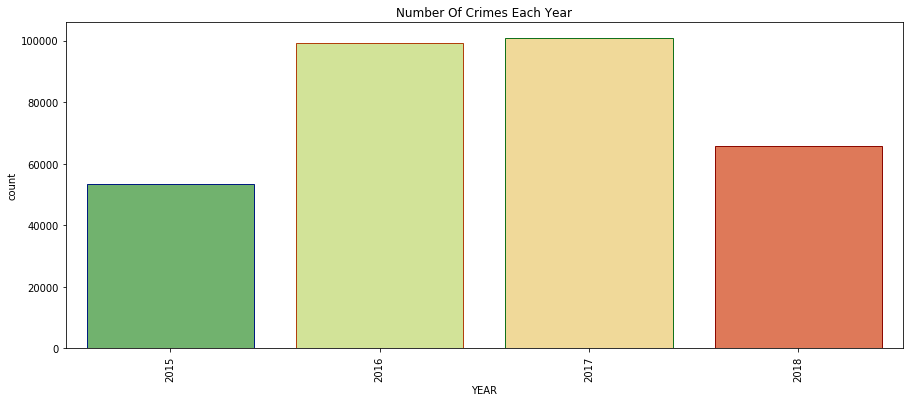

In [462]:
plt.subplots(figsize=(15,6))
sns.countplot('YEAR',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Crimes Each Year')
plt.show()

This graph seems to give a distorted view of reality, as the data collected in the years 2015 and 2018 do not concern the whole year, therefore it could seem that an increase in crimes occurred in the years 2016 and 2017.

#### Relationship Months and OffenseCodeGroup

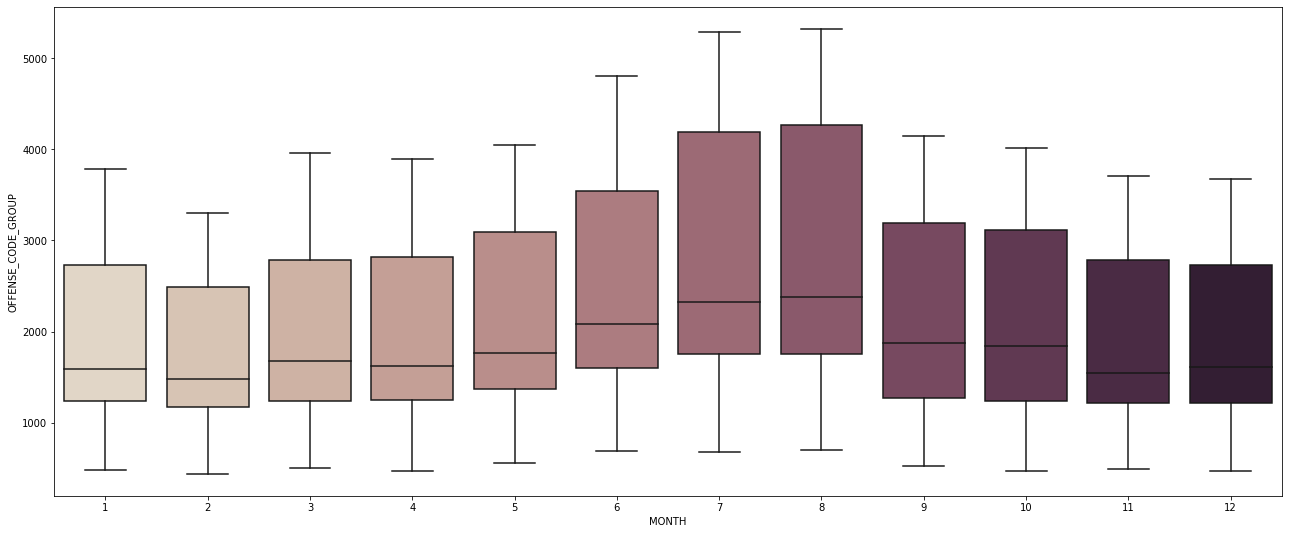

In [463]:
grouped = df.groupby(['MONTH','DISTRICT']).count()
sns.boxplot(x ="MONTH", y = "OFFENSE_CODE_GROUP", data = grouped.reset_index(), palette="ch:.25")

Crimes are more frequent in months 7 and 8, with the arrival of warmer temperatures. But considering that road accidents are particularly high in the original dataset, it would also seem to be due to an increase in travel. But this is beyond the scope of our study

## Data Cleaning and Data Manipolation

#### The records begin on June 14, 2015 and continue until September 3, 2018. We take the data of the year 2017, being the most recent and complete. The crimes of 2018 are recorded only until September and, therefore, not complete.

In [464]:
# take the data of the year 2017 and dropping the rest
crime_df=df[df['YEAR']==(2017)]
# Reset the index and dropping the previous index
crime_df = crime_df.reset_index(drop=True)
crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070304,1107,Fraud,FRAUD - IMPERSONATION,D4,905,NaN,2017-11-01 00:00:00,2017,11,Wednesday,0,Part Two,E BROOKLINE ST,42.339268,-71.072088,"(42.33926764, -71.07208833)"
1,I182070115,3114,Investigate Property,INVESTIGATE PROPERTY,D14,793,NaN,2017-10-11 17:43:00,2017,10,Wednesday,17,Part Three,KELTON ST,42.346501,-71.136128,"(42.34650102, -71.13612792)"
2,I182069920,3201,Property Lost,PROPERTY - LOST,B2,287,NaN,2017-08-31 12:08:00,2017,8,Thursday,12,Part Three,SHAWMUT AVE,42.331925,-71.084112,"(42.33192532, -71.08411222)"
3,I182069657,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,774,NaN,2017-06-27 07:00:00,2017,6,Tuesday,7,Part Two,COMMONWEALTH AVE,42.338482,-71.152890,"(42.33848236, -71.15288978)"
4,I182069334,3201,Property Lost,PROPERTY - LOST,B3,420,NaN,2017-12-08 22:00:00,2017,12,Friday,22,Part Three,MORTON ST,42.279591,-71.081323,"(42.27959103, -71.08132258)"


In [465]:
crime_df.shape

(100886, 17)

 I drop shooting column cause it's have lots of nan values and drop the columns not useful for the purpose of the project. Then for the other nan values we just drop the line not the column.

In [466]:
crime_df.drop(['SHOOTING','INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','DAY_OF_WEEK','HOUR','REPORTING_AREA','UCR_PART','STREET','Location'], axis='columns', inplace=True)
crime_df = crime_df.dropna(axis=0)
print(crime_df.isnull().sum(),"\nShape:",crime_df.shape)

OFFENSE_CODE_GROUP    0
DISTRICT              0
YEAR                  0
MONTH                 0
Lat                   0
Long                  0
dtype: int64 
Shape: (93549, 6)


In [467]:
crime_df.shape

(93549, 6)

In [468]:
#crime_df = crime_df.dropna()
crime_df.head()

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,Lat,Long
0,Fraud,D4,2017,11,42.339268,-71.072088
1,Investigate Property,D14,2017,10,42.346501,-71.136128
2,Property Lost,B2,2017,8,42.331925,-71.084112
3,Fraud,D14,2017,6,42.338482,-71.152890
4,Property Lost,B3,2017,12,42.279591,-71.081323


In [469]:
df['DISTRICT'].value_counts()

B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
Name: DISTRICT, dtype: int64

District A1 and A15 refer to the same neighborhood, later we will group the data of the two districts

## District Names
#### Converting District Code to District Name
#### Now, we take the name of the neighborhoods from the district number using Beautiful Soup (as an example of using the library), obtaining information from the site 'https://bpdnews.com/districts'.

In [470]:
url='https://bpdnews.com/districts'
resp=requests.get(url)
soup = BeautifulSoup(resp.content,'html.parser')
district=[]
paragraphs=soup.find_all('h2')
for paragraph in paragraphs:
    #print(paragraph.get_text(strip=True))
    district.append(paragraph.get_text(strip=True))

In [471]:
# we visualize what we have achieved
district

['Boston Police Headquarters',
 'District A-1 & A-15Downtown & Charlestown',
 'District A-7East Boston',
 'District B-2Roxbury',
 'District B-3Mattapan',
 'District C-6South Boston',
 'District C-11Dorchester',
 'District D-4South End',
 'District D-14Brighton',
 'District E-5West Roxbury',
 'District E-13Jamaica Plain',
 'District E-18Hyde Park']

In [472]:
# we remove first result
district.remove('Boston Police Headquarters')

In [473]:
# split the result
newDistrict=[]
import wordninja as wn
for i in district:
    a = wn.split(i)
    newDistrict.append(a)
print(newDistrict)

[['District', 'A', '1', 'A', '15', 'Downtown', 'Charlestown'], ['District', 'A', '7', 'East', 'Boston'], ['District', 'B', '2', 'Roxbury'], ['District', 'B', '3', 'Matta', 'pan'], ['District', 'C', '6', 'South', 'Boston'], ['District', 'C', '11', 'Dorchester'], ['District', 'D', '4', 'South', 'End'], ['District', 'D', '14', 'Brighton'], ['District', 'E', '5', 'West', 'Roxbury'], ['District', 'E', '13', 'Jamaica', 'Plain'], ['District', 'E', '18', 'Hyde', 'Park']]


In [474]:
# create a new dataframe
ds = pd.DataFrame(newDistrict)# create a dataframe
ds

,0,1,2,3,4,5,6
0,District,A,1,A,15,Downtown,Charlestown
1,District,A,7,East,Boston,None,None
2,District,B,2,Roxbury,None,None,None
3,District,B,3,Matta,pan,None,None
4,District,C,6,South,Boston,None,None
5,District,C,11,Dorchester,None,None,None
6,District,D,4,South,End,None,None
7,District,D,14,Brighton,None,None,None
8,District,E,5,West,Roxbury,None,None
9,District,E,13,Jamaica,Plain,None,None


In [475]:
# we remove the unnecessary columns and replace the None value in column 4
ds.drop([0,5,6], axis=1, inplace=True) 
ds.drop([0], axis=0, inplace=True)
ds[4]= ds[4].replace('None','')
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 4 columns):
1    10 non-null object
2    10 non-null object
3    10 non-null object
4    7 non-null object
dtypes: object(4)
memory usage: 400.0+ bytes


In [476]:
ds.fillna('', inplace=True)

In [477]:
# we combine columns 1 and 2 into one column and also columns 3 and 4
ds['District']= ds.apply(lambda x:'%s%s' % (x[1],x[2]), axis=1)# merge two columns
ds['Neighborhoods']= ds.apply(lambda x:'%s%s' % (x[3],x[4]), axis=1)
ds.drop([1,2,3,4], axis=1, inplace=True)

# we add two values manually
listSeries=[pd.Series(['A1','DowntownCharlestown'], index=ds.columns),
            pd.Series(['A15','DowntownCharlestown'], index=ds.columns)]
new_ds=ds.append(listSeries, ignore_index=True)
new_ds

,District,Neighborhoods
0,A7,EastBoston
1,B2,Roxbury
2,B3,Mattapan
3,C6,SouthBoston
4,C11,Dorchester
5,D4,SouthEnd
6,D14,Brighton
7,E5,WestRoxbury
8,E13,JamaicaPlain
9,E18,HydePark


Finally, we got the District-Borough dataframe.

#### We change the name of the columns in the crime_df dataset.

In [478]:
crime_df.columns = ['Group','District','Year','Month','Lat','Long']
crime_df.head()

,Group,District,Year,Month,Lat,Long
0,Fraud,D4,2017,11,42.339268,-71.072088
1,Investigate Property,D14,2017,10,42.346501,-71.136128
2,Property Lost,B2,2017,8,42.331925,-71.084112
3,Fraud,D14,2017,6,42.338482,-71.152890
4,Property Lost,B3,2017,12,42.279591,-71.081323


In [479]:
crime_df.tail()

,Group,District,Year,Month,Lat,Long
100881,Violations,E18,2017,1,42.275313,-71.115878
100882,Warrant Arrests,D14,2017,4,42.352720,-71.130205
100883,Warrant Arrests,B2,2017,1,42.330013,-71.091179
100884,Drug Violation,B2,2017,1,42.330013,-71.091179
100885,Search Warrants,B2,2017,1,42.330013,-71.091179


#### We join crime_df and new_ds (dataset that according to the police district gives us the name of the neighborhood in which it is operating)

In [480]:
crime_df = pd.merge(crime_df, new_ds, on="District", how='outer')
crime_df.head(10)

,Group,District,Year,Month,Lat,Long,Neighborhoods
0,Fraud,D4,2017,11,42.339268,-71.072088,SouthEnd
1,Fraud,D4,2017,11,42.353940,-71.078030,SouthEnd
2,Larceny,D4,2017,12,42.352569,-71.079788,SouthEnd
3,Recovered Stolen Property,D4,2017,12,42.352569,-71.079788,SouthEnd
4,Counterfeiting,D4,2017,10,42.342528,-71.076789,SouthEnd
5,Auto Theft,D4,2017,12,42.335968,-71.081299,SouthEnd
6,Larceny,D4,2017,11,42.343144,-71.095893,SouthEnd
7,Harassment,D4,2017,6,42.337002,-71.082276,SouthEnd
8,Harassment,D4,2017,3,42.337002,-71.082276,SouthEnd
9,Motor Vehicle Accident Response,D4,2017,11,42.341386,-71.080826,SouthEnd


In [481]:
# number of crimes by boroughs
crime_df['Neighborhoods'].value_counts()

Roxbury                14463
Dorchester             12793
DowntownCharlestown    12117
SouthEnd               12009
Mattapan               10625
SouthBoston             6583
Brighton                6141
HydePark                5409
JamaicaPlain            5184
WestRoxbury             4148
EastBoston              4077
Name: Neighborhoods, dtype: int64

In [482]:
# what are the categories unique of crimes
crime_df['Group'].unique()

array(['Fraud', 'Larceny', 'Recovered Stolen Property', 'Counterfeiting',
       'Auto Theft', 'Harassment', 'Motor Vehicle Accident Response',
       'Other', 'Missing Person Reported', 'Aggravated Assault',
       'Simple Assault', 'Property Lost', 'Investigate Property',
       'Vandalism', 'Embezzlement', 'Investigate Person',
       'Landlord/Tenant Disputes', 'Confidence Games',
       'Disorderly Conduct', 'Residential Burglary',
       'Missing Person Located', 'Auto Theft Recovery',
       'Restraining Order Violations', 'Larceny From Motor Vehicle',
       'Liquor Violation', 'License Violation', 'Violations', 'Towed',
       'Warrant Arrests', 'Other Burglary', 'Medical Assistance',
       'Drug Violation', 'Property Found',
       'Operating Under the Influence', 'Verbal Disputes', 'Robbery',
       'Firearm Violations', 'Fire Related Reports', 'Ballistics',
       'Prisoner Related Incidents', 'Property Related Damage',
       'Criminal Harassment', 'Commercial Burglary', 

Note that all the various interventions carried out by the police districts are included in the 'Group'. Therefore not all are crimes but, for example, items such as 'Property Lost' or 'Property Found' are also reported. For the purpose of the project, to find a safe neighborhood to move to, I intend to consider crimes that endanger personal safety.

#### We create a new dataframe, filtering the categories of crimes, in order to be more functional in achieving our goals.

In [483]:
# capitalize on strings
crime_df['Group']=crime_df['Group'].str.capitalize()
# we create a list with the crimes that interest us
l=['Fraud','Larceny','Counterfeiting','Automatic theft','Harassment','Other','Aggravated assault','Simple assault',
   'Vandalism','Embezzlement','Landlord/tenant disputes','Residential burglary','Restraining order violations', 
   'Larceny from motor vehicle','Liquor violation','License violation','Violations','Warrant arrests',
   'Other burglary','Drug violation','Robbery','Firearm violation','Property related damage','Criminal harassment', 
   'Commercial burglary','Offenses against child / family','Homicide','Firearm discovery','Bomb hoax',
   'Assembly or gathering violation','Arson','House invasion','Prostitution','Human trafficking','Explosives',
   'Manslaughter','Gambling','Human trafficking - involuntary servitude','Biological Threat']
# we create data frames with data in 'l'
crime_df= crime_df[crime_df['Group'].isin(l)]
crime_df['Group'].unique()

array(['Fraud', 'Larceny', 'Counterfeiting', 'Harassment', 'Other',
       'Aggravated assault', 'Simple assault', 'Vandalism',
       'Embezzlement', 'Landlord/tenant disputes', 'Residential burglary',
       'Restraining order violations', 'Larceny from motor vehicle',
       'Liquor violation', 'License violation', 'Violations',
       'Warrant arrests', 'Other burglary', 'Drug violation', 'Robbery',
       'Property related damage', 'Criminal harassment',
       'Commercial burglary', 'Offenses against child / family',
       'Homicide', 'Firearm discovery', 'Bomb hoax', 'Arson',
       'Prostitution', 'Human trafficking', 'Explosives', 'Manslaughter',
       'Gambling', 'Human trafficking - involuntary servitude'],
      dtype=object)

In [484]:
crime_df.shape

(44611, 7)

In [485]:
crime_df['Neighborhoods'].value_counts()

Roxbury                6918
SouthEnd               6842
DowntownCharlestown    6491
Dorchester             5640
Mattapan               4581
SouthBoston            3181
Brighton               2745
JamaicaPlain           2460
HydePark               2195
EastBoston             1915
WestRoxbury            1643
Name: Neighborhoods, dtype: int64

In [486]:
crime_df['Group'].value_counts()

Larceny                                      7555
Other                                        5008
Vandalism                                    4651
Simple assault                               4567
Drug violation                               4066
Larceny from motor vehicle                   2993
Warrant arrests                              2753
Aggravated assault                           2240
Fraud                                        1688
Residential burglary                         1520
Harassment                                   1452
Violations                                   1306
Robbery                                      1237
Restraining order violations                  512
License violation                             485
Counterfeiting                                452
Commercial burglary                           427
Liquor violation                              326
Landlord/tenant disputes                      277
Property related damage                       273


## Data Visualization & Analysis

#### Number Of Crimes Activities By District

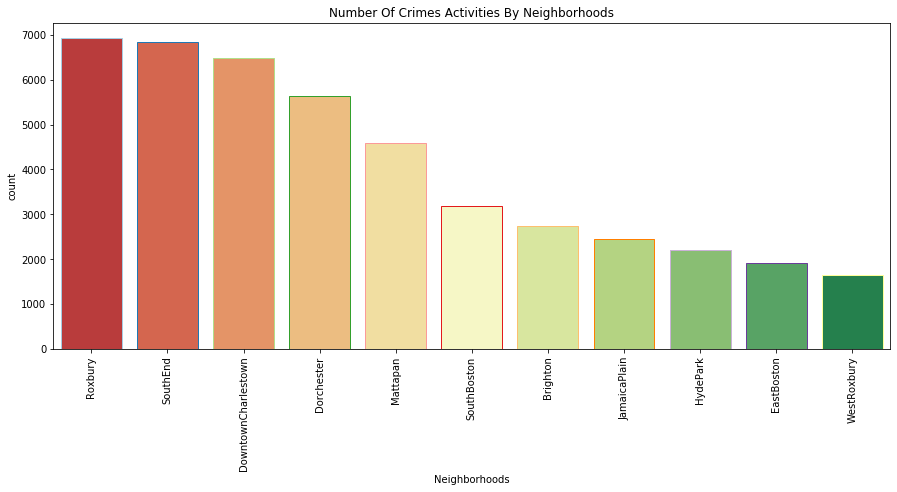

In [487]:
plt.subplots(figsize=(15,6))
sns.countplot('Neighborhoods',data=crime_df,palette='RdYlGn',edgecolor=sns.color_palette('Paired',20),order=crime_df['Neighborhoods'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Crimes Activities By Neighborhoods')
plt.show()

In this graph, we organize data by neighborhood based on observation of the occurrence of crimes in each of them. With the date ordered, we can see and conclude that the neighborhood with the greatest crime episodes is Roxbury, followed respectively by SouthEnd, DownTown/Charlestown, Dorchester and Mattapan.

#### Distribution of the typology of crimes

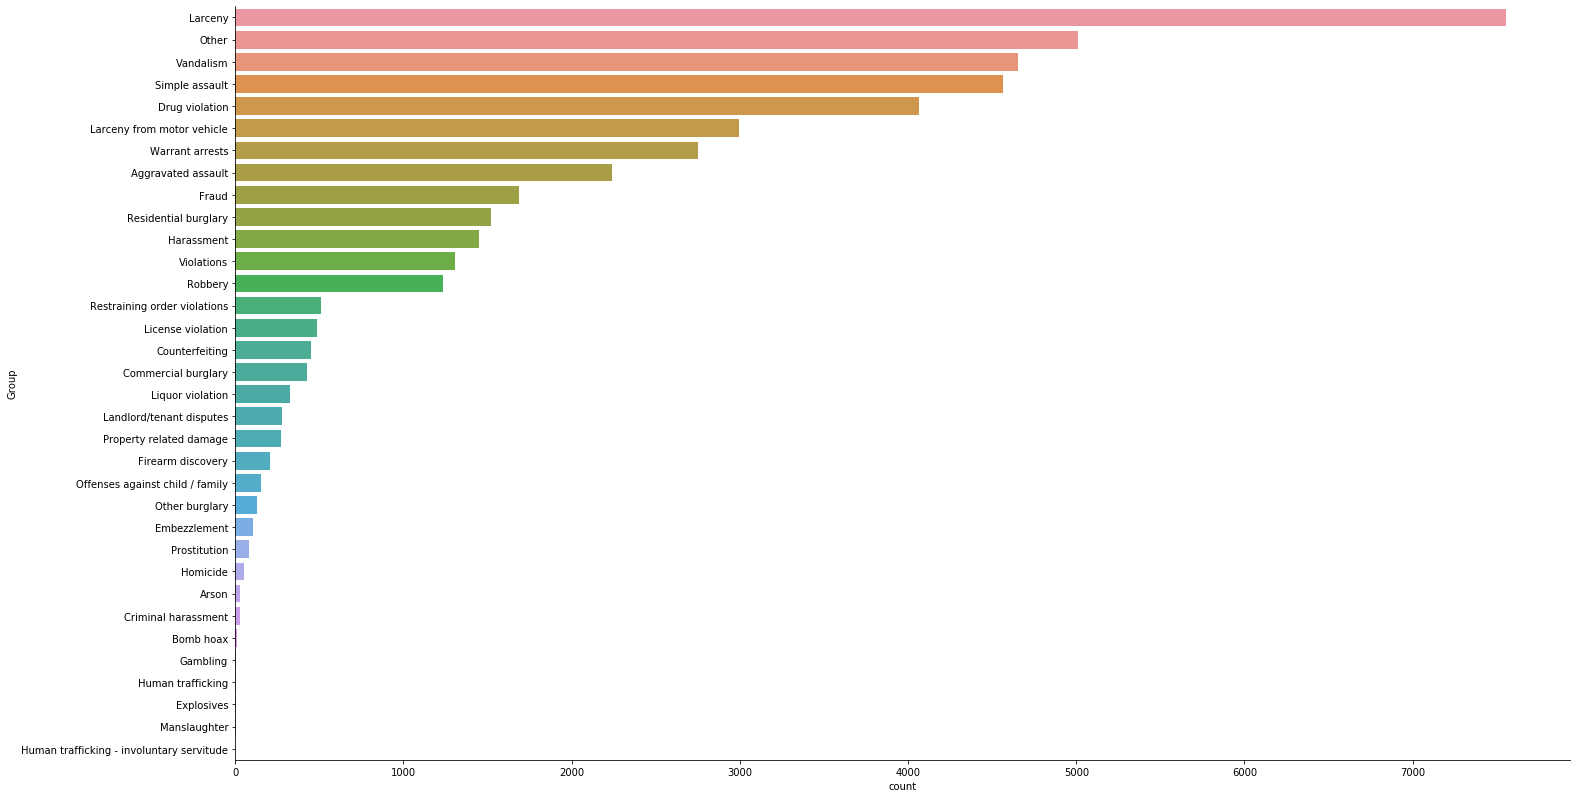

In [488]:
sns.catplot(y='Group',
            kind='count',
            height=11, 
            aspect=2,
            order=crime_df.Group.value_counts().index,
            data=crime_df)

The 5 most frequent types of crimes, having previously filtered the data for crimes and excluding accidents, appear to be: Larceny, Other, Vandalism, Single Assault and Drug Violation

#### Relationship between type of crimes and Neighborhoods

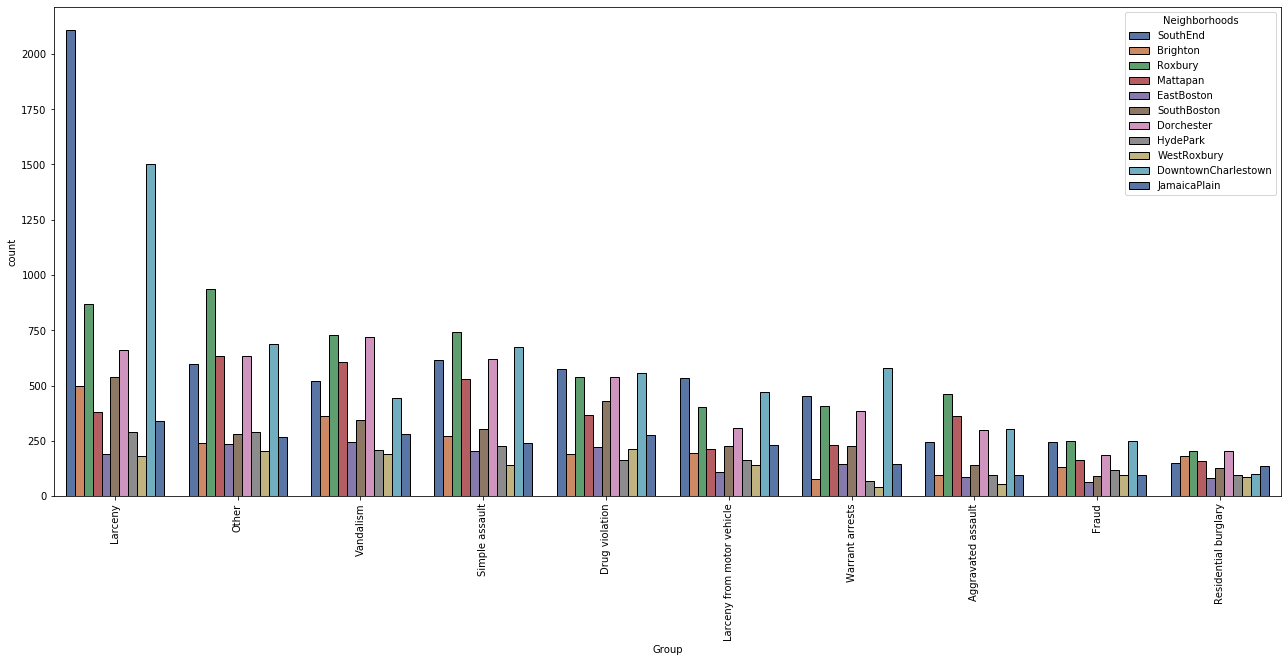

In [489]:
plt.rcParams["figure.figsize"] = 22,9
order = crime_df['Group'].value_counts().head(10).index
plt.xticks(rotation=90)
sns.countplot(data = crime_df, x='Group',hue='Neighborhoods',palette='deep', edgecolor=(0,0,0), order = order)

In this graph we observe the distribution of the various types of crimes by neighborhood.
In this graph we observe the distribution of the various types of crimes by neighborhood. We observe how the crime type 'larceny' has a high concentration in SouthEnd and, immediately followed, by DowntownCharleston. Furthermore, WestRoxbury is confirmed as the safest neighborhood in Boston on this chart.

#### Wordcloud representation of the most common types of crime in Boston. Words that appear larger give us an immediate indication of what they are

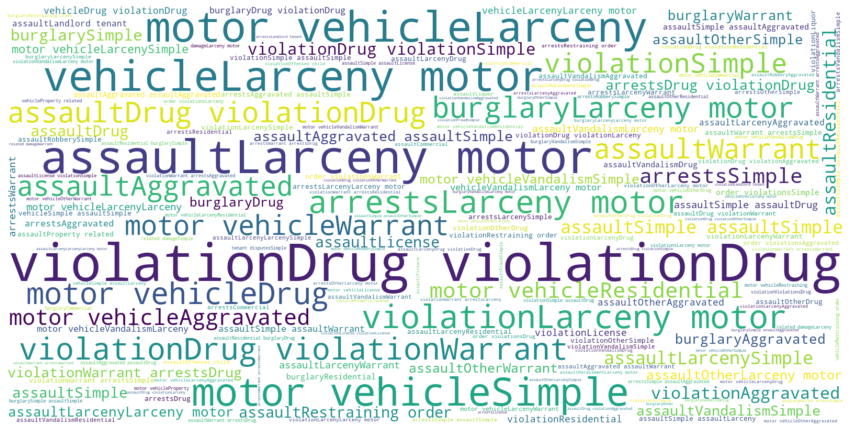

In [490]:
from wordcloud import WordCloud
text = []
for i in crime_df.Group:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This confirms what has been said so far

#### Let's look specifically at the 'West Roxbury' neighborhood, which turns out to be the neighborhood with the lowest crime rate compared to the others.

In [491]:
# create a new dataframe with data for the West Roxbury neighborhood only
cb=crime_df[crime_df['Neighborhoods']=='EastBoston']
c = cb[['Neighborhoods', 'Group']]
c.set_index('Neighborhoods',inplace = True)
c.head(10)

,Group
Neighborhoods,
EastBoston,Fraud
EastBoston,Vandalism
EastBoston,Restraining order violations
EastBoston,Other
EastBoston,Larceny from motor vehicle
EastBoston,Aggravated assault
EastBoston,Other
EastBoston,Larceny
EastBoston,Fraud


In [492]:
cb['Group'].value_counts().head()

Vandalism         244
Other             235
Drug violation    220
Simple assault    206
Larceny           190
Name: Group, dtype: int64

#### Let's look at the distribution of the top 10 types of crime in 'West Roxbury'

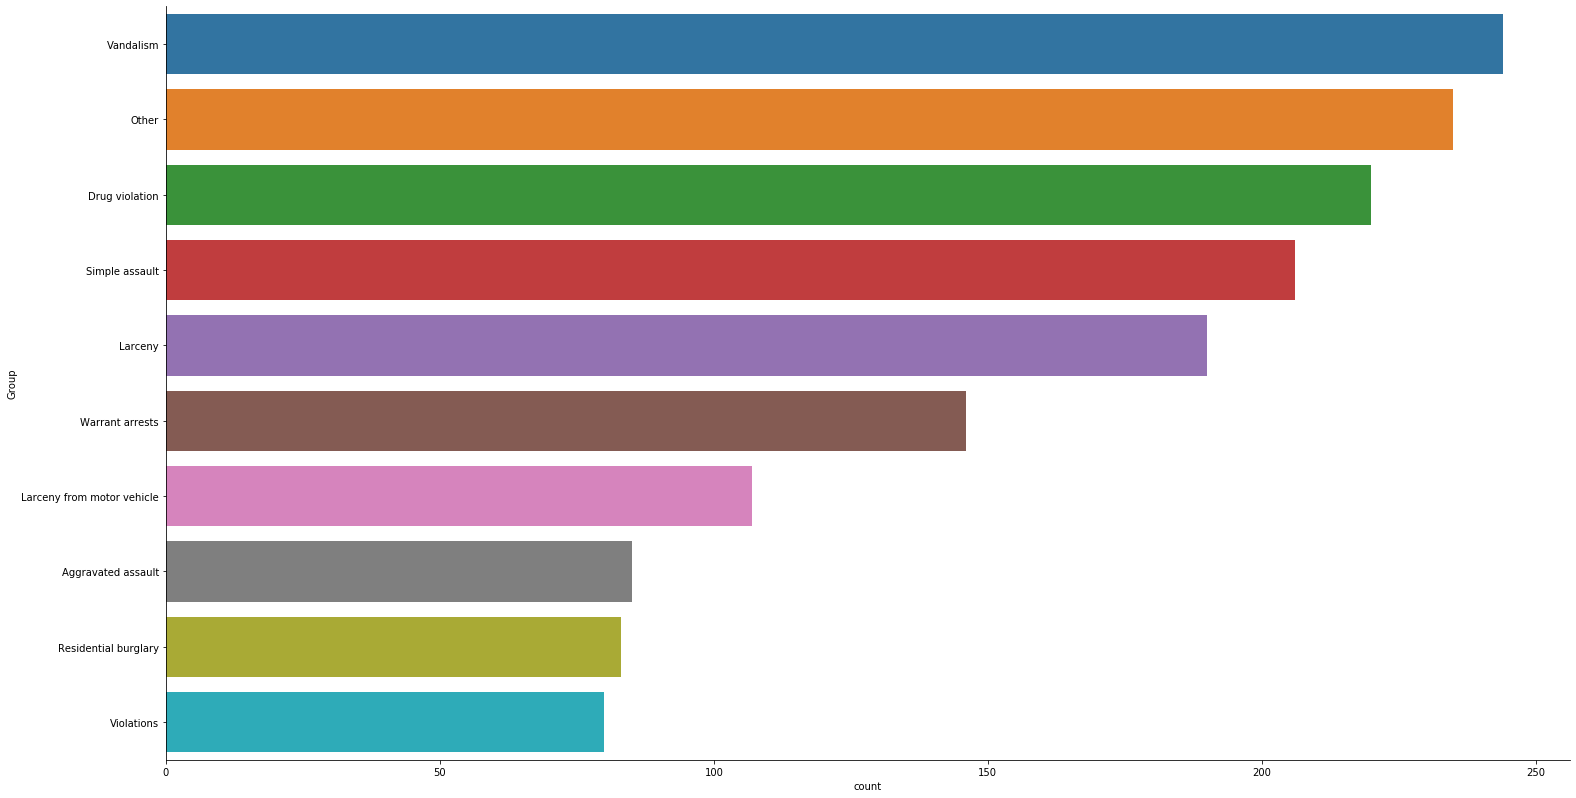

In [493]:
sns.catplot(y='Group',
            kind='count',
            height=11, 
            aspect=2,
            order=c['Group'].value_counts().head(10).index,
            data=c)

#### Now, we create a new dataset with only the fields: 'Neighborhoods, Lat, Long and CrimeTotal', more functional for the subsequent analysis steps

In [494]:
CrimeTotal=pd.DataFrame(crime_df.Neighborhoods.value_counts().rename_axis('Neighborhoods').reset_index(name='CrimeTotal'))
boston = crime_df.groupby(['Neighborhoods'],as_index = False).agg({'Lat':'mean','Long':'mean'})
boston = pd.merge(boston, CrimeTotal, on="Neighborhoods", how='outer', sort='CrimeTotal')
boston.sort_values(by=['CrimeTotal'], inplace=True, ascending=False)
boston

,Neighborhoods,Lat,Long,CrimeTotal
7,Roxbury,42.322219,-71.084363,6918
9,SouthEnd,42.343464,-71.080139,6842
2,DowntownCharlestown,42.325145,-71.007424,6491
1,Dorchester,42.299933,-71.063289,5640
6,Mattapan,42.286373,-71.085469,4581
8,SouthBoston,42.142916,-70.745135,3181
0,Brighton,42.334873,-71.116308,2745
5,JamaicaPlain,42.297511,-71.076788,2460
4,HydePark,42.264184,-71.119224,2195
3,EastBoston,42.354005,-70.995185,1915


#### Use geopy library to get the latitude and longitude values of New York City. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.¶

In [495]:
address = 'Boston, MA'

geolocator = Nominatim(user_agent='my-applications')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


#### Create a map of Boston with neighborhoods 

In [540]:
# create map of Boston using latitude and longitude values
map_boston = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat,long,neighborhoods,crime in zip(boston['Lat'],boston['Long'],boston['Neighborhoods'],boston['CrimeTotal']):
    label = '{}: Crime: {}'.format(neighborhoods, crime)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, long], 
                        radius = 4, 
                        popup = label, 
                        color = 'blue', 
                        fill = True, 
                        fill_opacity = 0.6, 
                       parse_html = False).add_to(map_boston)

map_boston

#### Let's create a map based on the crimes by neighborhood, considering the interquartile range

In [497]:
boston.describe()

,Lat,Long,CrimeTotal
count,11.000000,11.000000,11.000000
mean,42.290925,-71.038961,4055.545455
std,0.061119,0.104822,2087.296738
min,42.142916,-71.119224,1643.000000
25%,42.275279,-71.084916,2327.500000
50%,42.299933,-71.076788,3181.000000
75%,42.330009,-71.031334,6065.500000
max,42.354005,-70.745135,6918.000000


Text(0, 0.5, '# of Crime Incidents')

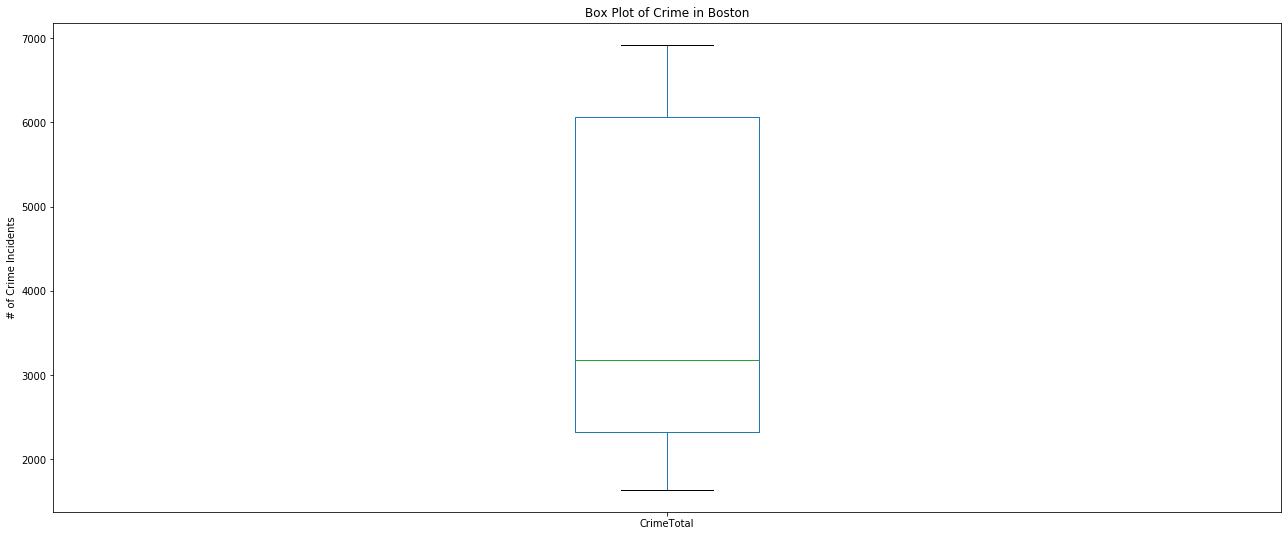

In [498]:
boston['CrimeTotal'].plot(kind = 'box', showfliers=False)
plt.title('Box Plot of Crime in Boston')
plt.ylabel('# of Crime Incidents')

In [541]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, neighborhoods, crime in zip(boston['Lat'], boston['Long'], boston['Neighborhoods'],boston['CrimeTotal']):
    label = '{}: Crime: {} incidents'.format(neighborhoods, crime)
    label = folium.Popup(label, parse_html = True)
    if int(crime) < 2318:
        color="green" 
    elif int(crime) > 6018:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(map_boston)
map_boston

The red markers are the areas with a higher crime rate, while the green ones with low intensity, and the yellow markers we consider them intermediate values.

## Methodology

In [500]:
boston

,Neighborhoods,Lat,Long,CrimeTotal
7,Roxbury,42.322219,-71.084363,6918
9,SouthEnd,42.343464,-71.080139,6842
2,DowntownCharlestown,42.325145,-71.007424,6491
1,Dorchester,42.299933,-71.063289,5640
6,Mattapan,42.286373,-71.085469,4581
8,SouthBoston,42.142916,-70.745135,3181
0,Brighton,42.334873,-71.116308,2745
5,JamaicaPlain,42.297511,-71.076788,2460
4,HydePark,42.264184,-71.119224,2195
3,EastBoston,42.354005,-70.995185,1915


#### Let's get the geographical coordinates of West Roxbury

First, define Foursquare Credentials and Version

In [501]:
CLIENT_ID = '5OTH1M5X5YAZN5YYDYZBMJGUX5DSATGYJ1URNEJJ2A0LME5T' # your Foursquare ID
CLIENT_SECRET = 'FZJRUN2OSGYERV0WOXXNFSITR4HQ1PVDZ0VGAIGBKNHTQNW4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5OTH1M5X5YAZN5YYDYZBMJGUX5DSATGYJ1URNEJJ2A0LME5T
CLIENT_SECRET:FZJRUN2OSGYERV0WOXXNFSITR4HQ1PVDZ0VGAIGBKNHTQNW4


#### Get the neighborhood's name

In [502]:
# Take the neighborhood that from the previous analysis was the safest: West Roxbury
boston.loc[10, 'Neighborhoods']

'WestRoxbury'

#### Get the neighborhood's latitude and longitude values

In [503]:
n_latitude = boston.loc[10, 'Lat'] # neighborhood latitude value
n_longitude = boston.loc[10, 'Long'] # neighborhood longitude value

neighborhood_name = boston.loc[10, 'Neighborhoods'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               n_latitude, 
                                                               n_longitude))

Latitude and longitude values of WestRoxbury are 42.22955219926357, -71.05524353338423.


#### Now, let's get the top 100 venues that are in West Roxbury within a radius of 500 meters.
First, let's create the GET request URL. Name your URL url.

In [504]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    n_latitude, 
    n_longitude, 
    radius,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5OTH1M5X5YAZN5YYDYZBMJGUX5DSATGYJ1URNEJJ2A0LME5T&client_secret=FZJRUN2OSGYERV0WOXXNFSITR4HQ1PVDZ0VGAIGBKNHTQNW4&v=20180605&ll=42.22955219926357,-71.05524353338423&radius=1000&limit=100'

#### Send the GET request and examine the results



In [505]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebbc0cdb4b684001b221eb8'},
 'response': {'headerLocation': 'Quincy',
  'headerFullLocation': 'Quincy',
  'headerLocationGranularity': 'city',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 42.238552208263584,
    'lng': -71.04311157651202},
   'sw': {'lat': 42.22055219026356, 'lng': -71.06737549025644}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c6aa2410e98a593a9712759',
       'name': 'Blue Hills Overlook',
       'location': {'lat': 42.22630497688804,
        'lng': -71.06099847742,
        'labeledLatLngs': [{'label': 'display',
          'lat': 42.22630497688804,
          'lng': -71.06099847742}],
        'distance': 596,
        'postalCode': '02186',
        'cc': 'US',
        'city': 'Milton',
        'state

#### Function that extracts the category of the venue

In [506]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Now we are ready to clean the json and structure it into a pandas dataframe.

In [507]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Blue Hills Overlook,Scenic Lookout,42.226305,-71.060998
1,Granite link golf club,Golf Course,42.229141,-71.051724
2,Blue Hills Reservation Pond,Fishing Spot,42.228282,-71.050894
3,Chickatawbut Hill,Trail,42.225689,-71.061120


#### Now we are ready to clean the json and structure it into a pandas dataframe
And how many venues were returned by Foursquare?

In [508]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


## Explore Neighborhoods in Boston

#### Let's create a function to repeat the same process to all the neighborhoods in Boston

In [509]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called boston_venues

In [510]:
boston_venues = getNearbyVenues(names=boston['Neighborhoods'],
                                   latitudes=boston['Lat'],
                                   longitudes=boston['Long']
                                  )

Roxbury
SouthEnd
DowntownCharlestown
Dorchester
Mattapan
SouthBoston
Brighton
JamaicaPlain
HydePark
EastBoston
WestRoxbury


#### Let's check the size of the resulting datafram

In [511]:
print(boston_venues.shape)
boston_venues.head(30)

(166, 7)


,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roxbury,42.322219,-71.084363,Popeyes Louisiana Kitchen,42.318486,-71.082749,Fried Chicken Joint
1,Roxbury,42.322219,-71.084363,Fernandez Liquors III,42.324183,-71.088952,Convenience Store
2,Roxbury,42.322219,-71.084363,Marshalls,42.319429,-71.081941,Department Store
3,Roxbury,42.322219,-71.084363,The Mall Of Roxbury,42.320220,-71.082122,Shopping Mall
4,Roxbury,42.322219,-71.084363,Save-A-Lot,42.319490,-71.082307,Grocery Store
5,Roxbury,42.322219,-71.084363,Comcast,42.319016,-71.082436,Electronics Store
6,Roxbury,42.322219,-71.084363,CROWN FRIED CHICKEN,42.319218,-71.081483,Fried Chicken Joint
7,Roxbury,42.322219,-71.084363,Malcolm X Park,42.322567,-71.089614,Park
8,Roxbury,42.322219,-71.084363,Brothers Super Liquors II,42.318698,-71.081536,Liquor Store
9,Roxbury,42.322219,-71.084363,Malcolm X Park Basketball Courts,42.320378,-71.089527,Basketball Court


#### Let's find out how many unique categories can be curated from all the returned venues

In [512]:
print('There are {} uniques categories.'.format(len(boston_venues['Venue Category'].unique())))

There are 95 uniques categories.


## Analyze Each Neighborhood

In [513]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Neighborhoods'] = boston_venues['Neighborhoods'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.head()

,Neighborhoods,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basketball Court,Bookstore,...,Tour Provider,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Roxbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roxbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Roxbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Roxbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Roxbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### And let's examine the new dataframe size

In [514]:
boston_onehot.shape

(166, 96)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [515]:
boston_grouped = boston_onehot.groupby('Neighborhoods').mean().reset_index()
boston_grouped

,Neighborhoods,Airport Terminal,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Basketball Court,Bookstore,...,Tour Provider,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Brighton,0.0,0.000000,0.022727,0.022727,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.022727,0.000000,0.022727,0.0000,0.00,0.00,0.022727,0.000000,0.022727
1,Dorchester,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.04,0.16,0.000000,0.000000,0.000000
2,EastBoston,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000000
3,HydePark,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000000
4,JamaicaPlain,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0625,0.00,0.00,0.000000,0.000000,0.000000
5,Mattapan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000000
6,Roxbury,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000000
7,SouthBoston,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000000
8,SouthEnd,0.0,0.035088,0.000000,0.000000,0.017544,0.035088,0.035088,0.0,0.017544,...,0.017544,0.000000,0.017544,0.000000,0.0000,0.00,0.00,0.017544,0.017544,0.000000
9,WestRoxbury,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.00,0.000000,0.000000,0.000000


#### Let's confirm the new size

In [516]:
boston_grouped.shape

(10, 96)

#### Let's print each neighborhood along with the top 5 most common venues

In [517]:
num_top_venues = 5

for hood in boston_grouped['Neighborhoods']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brighton----
                venue  freq
0  Italian Restaurant  0.07
1                 Gym  0.07
2  Chinese Restaurant  0.05
3         Coffee Shop  0.05
4         Pizza Place  0.05


----Dorchester----
                   venue  freq
0  Vietnamese Restaurant  0.16
1     Seafood Restaurant  0.08
2            Pizza Place  0.08
3                   Café  0.08
4         Sandwich Place  0.08


----EastBoston----
                venue  freq
0    Airport Terminal   1.0
1                Park   0.0
2  Salon / Barbershop   0.0
3         Salad Place   0.0
4          Restaurant   0.0


----HydePark----
            venue  freq
0      Donut Shop  0.14
1     Pizza Place  0.14
2    Home Service  0.14
3  Cosmetics Shop  0.14
4   Shopping Mall  0.14


----JamaicaPlain----
                 venue  freq
0          Pizza Place  0.12
1           Donut Shop  0.06
2                  Gym  0.06
3           Restaurant  0.06
4  Fried Chicken Joint  0.06


----Mattapan----
                  venue  freq
0  Caribbe

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order

In [518]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [519]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = boston_grouped['Neighborhoods']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brighton,Italian Restaurant,Gym,Chinese Restaurant,Playground,Pizza Place,Coffee Shop,Sandwich Place,Café,Cocktail Bar,Pub
1,Dorchester,Vietnamese Restaurant,Café,Sandwich Place,Seafood Restaurant,Pizza Place,Supermarket,Donut Shop,Pub,Fast Food Restaurant,Clothing Store
2,EastBoston,Airport Terminal,Garden,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Fast Food Restaurant,Fishing Spot,French Restaurant,Fried Chicken Joint
3,HydePark,Home Service,Supermarket,Donut Shop,Cosmetics Shop,Pizza Place,Shopping Mall,Mobile Phone Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant
4,JamaicaPlain,Pizza Place,Market,Fried Chicken Joint,Platform,Donut Shop,Dry Cleaner,Shoe Store,Southern / Soul Food Restaurant,Caribbean Restaurant,Plaza
5,Mattapan,Bar,Caribbean Restaurant,Yoga Studio,Garden,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Fast Food Restaurant,Fishing Spot,French Restaurant
6,Roxbury,Fried Chicken Joint,Electronics Store,Department Store,Convenience Store,Grocery Store,Basketball Court,Liquor Store,Shopping Mall,Park,Yoga Studio
7,SouthBoston,Lake,Performing Arts Venue,Yoga Studio,Frozen Yogurt Shop,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Fast Food Restaurant,Fishing Spot
8,SouthEnd,Coffee Shop,Italian Restaurant,Concert Hall,Shopping Mall,American Restaurant,Park,Department Store,Bakery,Bar,Gym / Fitness Center
9,WestRoxbury,Fishing Spot,Golf Course,Yoga Studio,Garden,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Fast Food Restaurant,French Restaurant


#### We see in particular some categories of venues, through 'categoryId', taken from Foursquare.

In [520]:
def Get_Number_Of_Venues(ID, category):
    for i in range(len(boston)):
        p_lat =boston.iloc[i,1]
        p_lon =boston.iloc[i,2]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,radius,LIMIT) 
        test_results = requests.get(url).json()
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        boston.loc[i, category] = count[0]

In [521]:
boston['Park'] = ''
boston['Library'] = ''
boston['Pool'] = ''
boston['Playground'] = ''
boston['Cinemas'] = ''
boston['Gym'] = ''
boston['College & University'] = ''
boston['School']= ''
boston['Supermarket'] = ''
boston['Metro Station'] = ''
boston['Bus Stop'] = ''

boston

,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop
7,Roxbury,42.322219,-71.084363,6918,,,,,,,,,,,
9,SouthEnd,42.343464,-71.080139,6842,,,,,,,,,,,
2,DowntownCharlestown,42.325145,-71.007424,6491,,,,,,,,,,,
1,Dorchester,42.299933,-71.063289,5640,,,,,,,,,,,
6,Mattapan,42.286373,-71.085469,4581,,,,,,,,,,,
8,SouthBoston,42.142916,-70.745135,3181,,,,,,,,,,,
0,Brighton,42.334873,-71.116308,2745,,,,,,,,,,,
5,JamaicaPlain,42.297511,-71.076788,2460,,,,,,,,,,,
4,HydePark,42.264184,-71.119224,2195,,,,,,,,,,,
3,EastBoston,42.354005,-70.995185,1915,,,,,,,,,,,


In [522]:
Get_Number_Of_Venues('4bf58dd8d48988d163941735','Park')
Get_Number_Of_Venues('4bf58dd8d48988d12f941735','Library')
Get_Number_Of_Venues('4bf58dd8d48988d15e941735','Pool')
Get_Number_Of_Venues('4bf58dd8d48988d1e7941735','Playground')
Get_Number_Of_Venues('4bf58dd8d48988d180941735','Cinemas')
Get_Number_Of_Venues('4bf58dd8d48988d176941735','Gym')
Get_Number_Of_Venues('4d4b7105d754a06372d81259','College & University')
Get_Number_Of_Venues('4bf58dd8d48988d13b941735','School')
Get_Number_Of_Venues('52f2ab2ebcbc57f1066b8b46','Supermarket')
Get_Number_Of_Venues('4bf58dd8d48988d1fd931735','Metro Station')
Get_Number_Of_Venues('52f2ab2ebcbc57f1066b8b4f','Bus Stop')
boston.head(30)

,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop
7,Roxbury,42.322219,-71.084363,6918,5,1,0,1,0,1,12,15,1,2,2
9,SouthEnd,42.343464,-71.080139,6842,0,0,0,0,0,0,0,0,0,0,0
2,DowntownCharlestown,42.325145,-71.007424,6491,1,0,0,0,0,0,0,0,0,0,0
1,Dorchester,42.299933,-71.063289,5640,41,26,5,18,1,47,49,28,3,11,20
6,Mattapan,42.286373,-71.085469,4581,21,11,10,18,0,17,50,32,3,16,13
8,SouthBoston,42.142916,-70.745135,3181,3,1,0,4,0,3,1,12,3,0,0
0,Brighton,42.334873,-71.116308,2745,9,1,0,4,0,2,16,27,0,1,0
5,JamaicaPlain,42.297511,-71.076788,2460,0,0,1,0,0,0,0,0,0,0,0
4,HydePark,42.264184,-71.119224,2195,2,1,0,2,0,1,2,10,1,0,0
3,EastBoston,42.354005,-70.995185,1915,9,1,1,7,0,3,11,21,1,3,1


In [524]:
# Cinemas Column is a float when read from csv lets change it to an integer
boston['Cinemas']= boston['Cinemas'].astype('int')
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 7 to 10
Data columns (total 15 columns):
Neighborhoods           11 non-null object
Lat                     11 non-null float64
Long                    11 non-null float64
CrimeTotal              11 non-null int64
Park                    11 non-null int64
Library                 11 non-null int64
Pool                    11 non-null int64
Playground              11 non-null int64
Cinemas                 11 non-null int32
Gym                     11 non-null int64
College & University    11 non-null int64
School                  11 non-null int64
Supermarket             11 non-null int64
Metro Station           11 non-null int64
Bus Stop                11 non-null int64
dtypes: float64(2), int32(1), int64(11), object(1)
memory usage: 1.6+ KB


## Cluster Neighborhoods

In [525]:
boston_cluster = boston.iloc[:,3:]
print(boston_cluster.shape)
boston_cluster.head()

(11, 12)


,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop
7,6918,5,1,0,1,0,1,12,15,1,2,2
9,6842,0,0,0,0,0,0,0,0,0,0,0
2,6491,1,0,0,0,0,0,0,0,0,0,0
1,5640,41,26,5,18,1,47,49,28,3,11,20
6,4581,21,11,10,18,0,17,50,32,3,16,13


In [526]:
cluster_num = 3
boston_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(boston_cluster)

In [527]:
boston.insert(0,'label', boston_kmeans.labels_)
boston

,label,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop
7,2,Roxbury,42.322219,-71.084363,6918,5,1,0,1,0,1,12,15,1,2,2
9,2,SouthEnd,42.343464,-71.080139,6842,0,0,0,0,0,0,0,0,0,0,0
2,2,DowntownCharlestown,42.325145,-71.007424,6491,1,0,0,0,0,0,0,0,0,0,0
1,1,Dorchester,42.299933,-71.063289,5640,41,26,5,18,1,47,49,28,3,11,20
6,1,Mattapan,42.286373,-71.085469,4581,21,11,10,18,0,17,50,32,3,16,13
8,0,SouthBoston,42.142916,-70.745135,3181,3,1,0,4,0,3,1,12,3,0,0
0,0,Brighton,42.334873,-71.116308,2745,9,1,0,4,0,2,16,27,0,1,0
5,0,JamaicaPlain,42.297511,-71.076788,2460,0,0,1,0,0,0,0,0,0,0,0
4,0,HydePark,42.264184,-71.119224,2195,2,1,0,2,0,1,2,10,1,0,0
3,0,EastBoston,42.354005,-70.995185,1915,9,1,1,7,0,3,11,21,1,3,1


In [542]:
cluster_map = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, long, neighborhoods, crime, cluster in zip(boston['Lat'],boston['Long'], boston['Neighborhoods'], boston['CrimeTotal'], boston['label']):
    label = 'Cluster #: {} Neighborhoods: {} Crime: {} Incidents'.format(cluster, neighborhoods, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        color="green" 
    elif cluster == 2:
        color = "red"
    else: 
        color="yellow"
   
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map

#### Check optimal  of clusters
We Originally selected three clusters because this is the number of categories we used when analyzing the crime data.
But lets check if this is the optimal number of clusters

In [529]:
elbow = []
for k in range(1,len(boston_cluster)):
    km = KMeans(n_clusters = k, random_state = 0).fit(boston_cluster)
    elbow.append(km.inertia_)

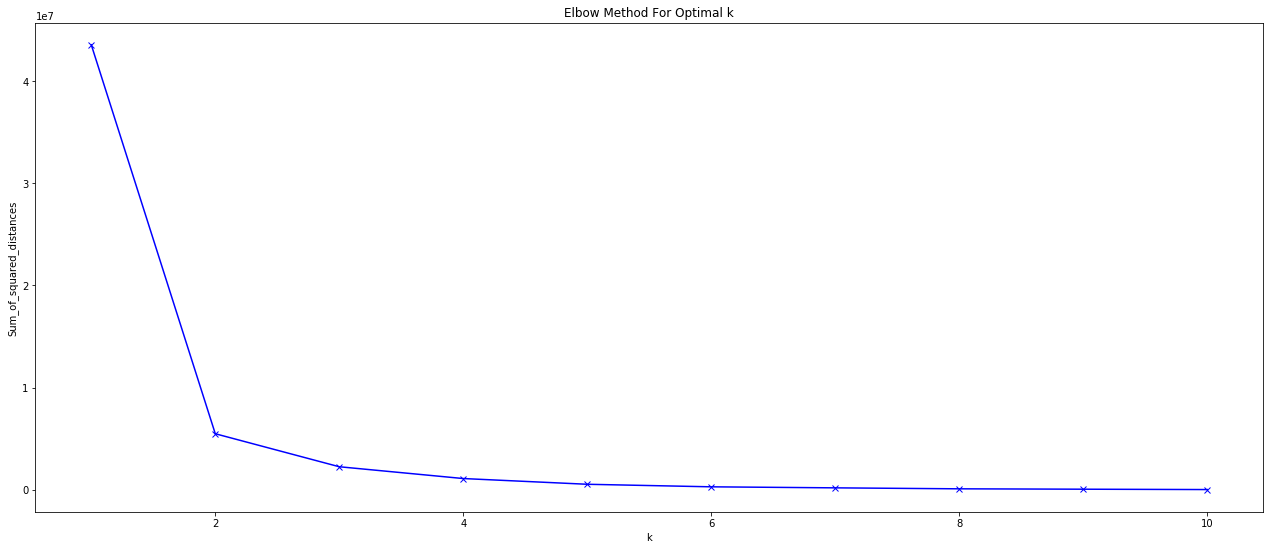

In [530]:
K = range(1,len(boston_cluster))
#plt.figure(figsize =(20,10))
plt.plot(K,  elbow,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Optimal k = 2
Let's recalculate the k-means with k = 2

In [531]:
cluster_num1 = 2
boston_kmeans = KMeans(n_clusters = cluster_num1, random_state = 0).fit(boston_cluster)

In [532]:
boston.insert(0,'clusterLabel', boston_kmeans.labels_)
boston

,clusterLabel,label,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop
7,1,2,Roxbury,42.322219,-71.084363,6918,5,1,0,1,0,1,12,15,1,2,2
9,1,2,SouthEnd,42.343464,-71.080139,6842,0,0,0,0,0,0,0,0,0,0,0
2,1,2,DowntownCharlestown,42.325145,-71.007424,6491,1,0,0,0,0,0,0,0,0,0,0
1,1,1,Dorchester,42.299933,-71.063289,5640,41,26,5,18,1,47,49,28,3,11,20
6,1,1,Mattapan,42.286373,-71.085469,4581,21,11,10,18,0,17,50,32,3,16,13
8,0,0,SouthBoston,42.142916,-70.745135,3181,3,1,0,4,0,3,1,12,3,0,0
0,0,0,Brighton,42.334873,-71.116308,2745,9,1,0,4,0,2,16,27,0,1,0
5,0,0,JamaicaPlain,42.297511,-71.076788,2460,0,0,1,0,0,0,0,0,0,0,0
4,0,0,HydePark,42.264184,-71.119224,2195,2,1,0,2,0,1,2,10,1,0,0
3,0,0,EastBoston,42.354005,-70.995185,1915,9,1,1,7,0,3,11,21,1,3,1


In [543]:
cluster_map = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, long, neighborhoods, crime, cluster in zip(boston['Lat'],boston['Long'], boston['Neighborhoods'], boston['CrimeTotal'], boston['label']):
    label = 'Cluster #: {} Neighborhoods: {} Crime: {} Incidents'.format(cluster, neighborhoods, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        color="green" 
    else :
        color = "red"
   
   
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map

## Results & Discussion

In [534]:
Neighborhoods_Good = boston[boston['clusterLabel'] == 0]
Neighborhoods_Bad = boston[boston['clusterLabel'] == 1]

print('Good Neighborhoods: ' + str(len(Neighborhoods_Good)))
print('Bad Neighborhoods of: ' + str(len(Neighborhoods_Bad)))

Good Neighborhoods: 6
Bad Neighborhoods of: 5


Based on the results, there seems to be parity between neighborhoods to avoid and those that are safer to move to instead.
Bearing in mind that Boston is generally considered to be a safe city over 80%, these results may be acceptable.

#### Good Neighborhoods 

In [535]:
Neighborhoods_Good['Neighborhoods']

8      SouthBoston
0         Brighton
5     JamaicaPlain
4         HydePark
3       EastBoston
10     WestRoxbury
Name: Neighborhoods, dtype: object

#### Bad Neighborhoods

In [536]:
Neighborhoods_Bad['Neighborhoods']

7                Roxbury
9               SouthEnd
2    DowntownCharlestown
1             Dorchester
6               Mattapan
Name: Neighborhoods, dtype: object

#### The best safest neighborhoods in Boston

In [537]:
sorted_df = Neighborhoods_Good.sort_values(by = 'CrimeTotal', axis = 0, ascending = True)                                            
sorted_df.reset_index(drop = True, inplace = True)
sorted_df

,clusterLabel,label,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop
0,0,0,WestRoxbury,42.229552,-71.055244,1643,0,0,2,0,0,0,0,0,0,0,0
1,0,0,EastBoston,42.354005,-70.995185,1915,9,1,1,7,0,3,11,21,1,3,1
2,0,0,HydePark,42.264184,-71.119224,2195,2,1,0,2,0,1,2,10,1,0,0
3,0,0,JamaicaPlain,42.297511,-71.076788,2460,0,0,1,0,0,0,0,0,0,0,0
4,0,0,Brighton,42.334873,-71.116308,2745,9,1,0,4,0,2,16,27,0,1,0
5,0,0,SouthBoston,42.142916,-70.745135,3181,3,1,0,4,0,3,1,12,3,0,0


The safest neighborhood is West Roxbury

#### Now let's see what has more venues

In [538]:
Neighborhoods_Good['Total_Venues'] = Neighborhoods_Good['Park'] + Neighborhoods_Good['Library'] + Neighborhoods_Good['Pool'] + Neighborhoods_Good['Playground'] + Neighborhoods_Good['Cinemas'] + Neighborhoods_Good['Gym']+ Neighborhoods_Good['College & University']+ Neighborhoods_Good['School']+ Neighborhoods_Good['Supermarket']+ Neighborhoods_Good['Metro Station']+ Neighborhoods_Good['Bus Stop']
Neighborhoods_Good.head()

C:\Users\Claudia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,clusterLabel,label,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop,Total_Venues
8,0,0,SouthBoston,42.142916,-70.745135,3181,3,1,0,4,0,3,1,12,3,0,0,27
0,0,0,Brighton,42.334873,-71.116308,2745,9,1,0,4,0,2,16,27,0,1,0,60
5,0,0,JamaicaPlain,42.297511,-71.076788,2460,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,HydePark,42.264184,-71.119224,2195,2,1,0,2,0,1,2,10,1,0,0,19
3,0,0,EastBoston,42.354005,-70.995185,1915,9,1,1,7,0,3,11,21,1,3,1,58


In [539]:
sorted_df1 = Neighborhoods_Good.sort_values(by = 'Total_Venues', axis = 0, ascending = False)
sorted_df1.reset_index(drop = True, inplace = True)
sorted_df1.head(20)

,clusterLabel,label,Neighborhoods,Lat,Long,CrimeTotal,Park,Library,Pool,Playground,Cinemas,Gym,College & University,School,Supermarket,Metro Station,Bus Stop,Total_Venues
0,0,0,Brighton,42.334873,-71.116308,2745,9,1,0,4,0,2,16,27,0,1,0,60
1,0,0,EastBoston,42.354005,-70.995185,1915,9,1,1,7,0,3,11,21,1,3,1,58
2,0,0,SouthBoston,42.142916,-70.745135,3181,3,1,0,4,0,3,1,12,3,0,0,27
3,0,0,HydePark,42.264184,-71.119224,2195,2,1,0,2,0,1,2,10,1,0,0,19
4,0,0,WestRoxbury,42.229552,-71.055244,1643,0,0,2,0,0,0,0,0,0,0,0,2
5,0,0,JamaicaPlain,42.297511,-71.076788,2460,0,0,1,0,0,0,0,0,0,0,0,1


## Conclusions

  Boston is definitely a city that has improved a lot over the years, (as can be seen in the graph of the distribution of crimes over the years, in which there is clearly a sharp decrease in crimes between the years 2017 and 2018), to the point of being considered from their citizens quite safe.

  From our analysis and from the data in our possession, we identify two categories of neighborhoods:

  - 'Good Neighborhoods': SouthBoston, Brighton, JamaicaPlain, HydePark, EastBoston, WestRoxbury

  - 'Bad Neighborhoods': Roxbury, SouthEnd, DowntownCharlestown, Dorchester, Mattapan

  I remember that the types of crimes were selected and therefore a part of them was worked on. This choice was made to adapt the data to our purpose: that is, to find a place to move safely from a personal security point of view, but also because looking at the data as a whole, there is a clear prevalence of crime-type events, identified as 'Motor Vehicle Accident Response' and this would have led to false results focused on this result and, therefore, non-adherent and significant to achieve our purpose.

  Therefore to all those tourists who ask for a safe area of Boston where to stay I would recommend 'West Roxbury'. But for those who intend or need to move for a longer time I think there must be a good compromise between safety and comfort (understood as ease of movement, nearby supermarkets, but also as the presence of places for leisure), therefore I would recommend 'East Boston'.
Finally, the project could later be expanded by also including data on the cost and rents of houses.
